Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

**Important Note:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Use caution when interpreting the code or results.

## Overview of the Dandiset
This Dandiset (001174) contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) of macaques.
The data were acquired using one-photon calcium imaging with a microendoscope while the animals were at rest or engaged in an arm reaching task.

## Notebook Overview
This notebook will guide you through the process of loading, exploring, and visualizing data from this Dandiset.
We will cover the following steps:
1.  Loading the Dandiset using the DANDI API.
2.  Loading metadata and data from an NWB file within the Dandiset.
3.  Visualizing the mean fluorescence across ROIs over time.
4.  Visualizing the image masks for the ROIs.
5. Summarizing the findings

## Required Packages
The following packages are required to run this notebook. Please ensure that you have installed them before proceeding:
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Loading the Dandiset
We will use the DANDI API to connect to the Dandiset and list its assets.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## Loading and Visualizing Data from an NWB File
We will now load data from one of the NWB files in the Dandiset and visualize it.  Here we select the file `sub-Q/sub-Q_ophys.nwb`.
We will load the NWB file using the URL and display some of its metadata.
Then, we'll plot the mean fluorescence across ROIs over time and visualize the image masks for the ROIs.

In [3]:
# Load NWB file
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
file = remfile.File(url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, mode='r')
nwb = io.read()

print(nwb)
print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)

root pynwb.file.NWBFile at 0x139127657074512
Fields:
  acquisition: {
    OnePhotonSeries <class 'pynwb.ophys.OnePhotonSeries'>
  }
  devices: {
    Miniscope <class 'pynwb.device.Device'>
  }
  file_create_date: [datetime.datetime(2025, 1, 23, 15, 39, 28, 539904, tzinfo=tzutc())]
  identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
  imaging_planes: {
    ImagingPlane <class 'pynwb.ophys.ImagingPlane'>
  }
  processing: {
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Calcium imaging in SMA during the spontaneous condition
  session_start_time: 2022-09-15 13:16:33.129000+00:00
  subject: subject pynwb.file.Subject at 0x139125767960384
Fields:
  age: P5Y
  age__reference: birth
  sex: F
  species: Macaca mulatta
  subject_id: Q

  timestamps_reference_time: 2022-09-15 13:16:33.129000+00:00

Calcium imaging in SMA during the spontaneous condition
5c2c4bb2-8310-4e0e-ae01-fd872edba928
2022-09-15 13:16:33.129000+00:00


## Plotting Mean Fluorescence Across ROIs Over Time

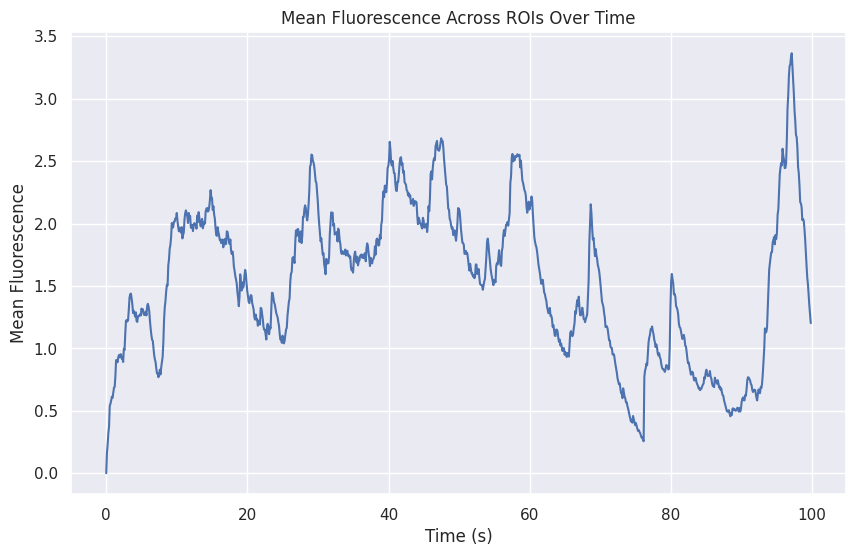

In [4]:
# Extract fluorescence data
roi_response_series = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"]
data = roi_response_series.data
timestamps = roi_response_series.timestamps

# Limit data to the first 1000 timepoints
num_timepoints = min(1000, len(data))
data = data[:num_timepoints, :]

# Handle missing timestamps
if timestamps is None:
    rate = roi_response_series.rate
    timestamps = np.arange(num_timepoints) / rate
else:
    timestamps = timestamps[:num_timepoints]

# Compute mean fluorescence across ROIs
mean_fluorescence = np.mean(data, axis=1)

# Generate plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, mean_fluorescence)
plt.xlabel("Time (s)")
plt.ylabel("Mean Fluorescence")
plt.title("Mean Fluorescence Across ROIs Over Time")
plt.show()

## Visualizing Image Masks for ROIs

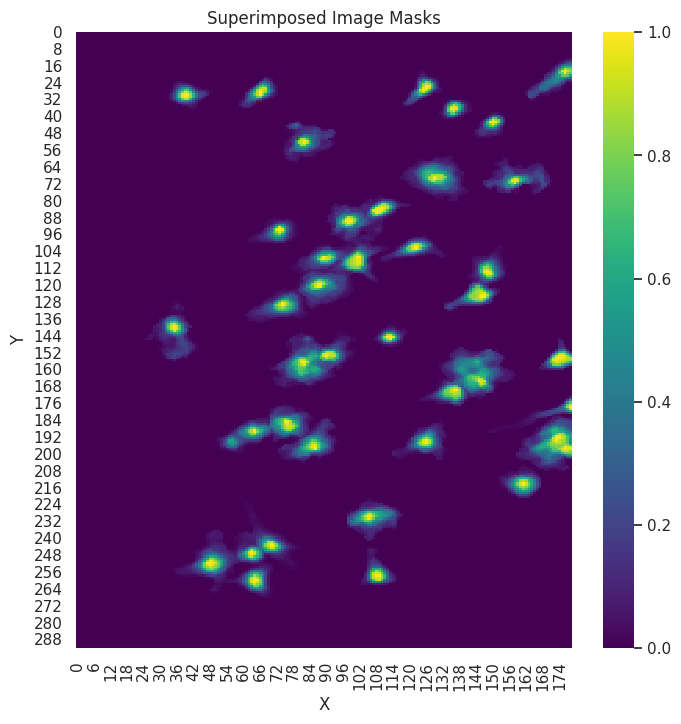

In [5]:
# Extract image masks
plane_segmentation = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
image_masks = plane_segmentation["image_mask"]

# Superimpose image masks
superimposed_masks = np.max(image_masks[:], axis=0)

# Generate heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(superimposed_masks, cmap="viridis")
plt.title("Superimposed Image Masks")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Summary
In this notebook, we have shown how to load and visualize data from Dandiset 001174, focusing on calcium imaging data from an NWB file.
We have demonstrated how to load the Dandiset using the DANDI API, load metadata and data from an NWB file, and visualize the mean fluorescence across ROIs and the image masks for the ROIs.

## Possible Future Directions
- Explore other NWB files in the Dandiset.
- Perform more advanced analysis of the calcium imaging data, such as spike detection and cell typing.
- Correlate the calcium imaging data with behavioral data from the reaching task.